In [1]:
import matplotlib.pyplot as plt
import statistics
import math
import random

In [2]:
%matplotlib inline

In [3]:
def coin_flip():
    coin = random.randint(0,1)
    if coin == 1:
        return True
    return False

def get_ratio(list_tup):
    return [x/(x+y) for x,y in list_tup]

def get_total(list_tup):
    return [x+y for x,y in list_tup]

In [4]:
def n_flips(n=2**16):
    head_flips = 0
    tail_flips = 0
    checkpoint = []
    for flip in range(n):
        if coin_flip():
            head_flips += 1
        else:
            tail_flips += 1
        if math.log2(flip+1) % 1 == 0:
            checkpoint.append((head_flips, tail_flips))
    if sum(checkpoint[len(checkpoint)-1]) != head_flips + tail_flips:
        checkpoint.append((head_flips,tail_flips))
    
    return checkpoint
flip_data = n_flips()

In [5]:
total = get_total(flip_data)

In [6]:
x_axis = ['2**{}'.format(x) for x in range(17)]
ratio_axis = [x/10 for x in range(11)]
ratio_axis_label = ['{}%'.format(x*10) for x in range(11)]

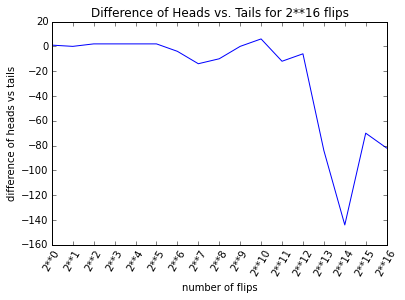

In [7]:
plt.plot([x-y for x,y in flip_data])
plt.xticks(range(17), x_axis, rotation=60)
plt.xlabel('number of flips')
plt.ylabel('difference of heads vs tails')
plt.title('Difference of Heads vs. Tails for 2**16 flips')
plt.show()

# Line Plot of Difference in Heads vs. Tails for 2<sup>16</sup> Flips

## Observations
    1. Despite despite expecting a return to near 0 (we flipped the coin 65536 times) we never get back to an equal number of heads and tails flips
    2. Having said that, for such a large number of flips the fact it stayed within 200 of 0 suggests that the randomness is working, we have equal chances of heads and tails 

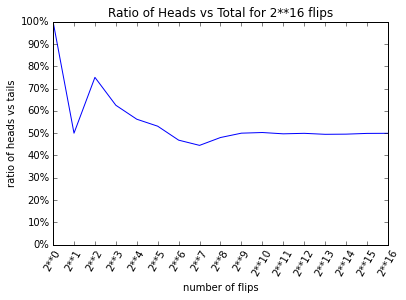

In [8]:
plt.plot(get_ratio(flip_data))
plt.xticks(range(17), x_axis, rotation=60)
plt.xlabel('number of flips')
plt.yticks(ratio_axis, ratio_axis_label)
plt.ylabel('ratio of heads vs tails')
plt.title('Ratio of Heads vs Total for 2**16 flips')
plt.show()

# Line Plot of Ratio of Heads vs Total flips for 2<sub>16</sub> flips.

## Observations
    1. We can expect the first point to be either 0% or 100% since we only have a single flip at that point.  In this case the first flip is heads so it starts at 100%  From there the line gradually evens out as we increase in flips.
    2. As the data grows the line evens out because there are so many results it is difficult to budge it in either direction.
    3. The scale is important to keep in mind.  Since we haven't changed the scale yet it looks linear but is actually increasing quadratically.  This means that one tick on the left can represent 1 or 2 flips whereas those on the right can represent 10,000 plus flips.

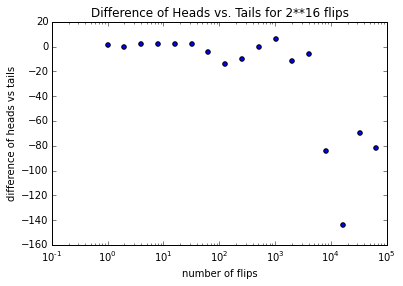

In [9]:
plt.scatter(total,[x-y for x,y in flip_data])
plt.xscale('log')
plt.xlabel('number of flips')
plt.ylabel('difference of heads vs tails')
plt.title('Difference of Heads vs. Tails for 2**16 flips')
plt.show()


# Scatter Plot of Difference of Heads vs Tails for 2<sup>16</sup> Flips
## Observations
    1. He we change from linear represention on the x-axis to logrithmic.  This will persist for the rest of the data so I won't mention it again. 
    2. We expect this data to be a match for the same line chart two above and it is.  

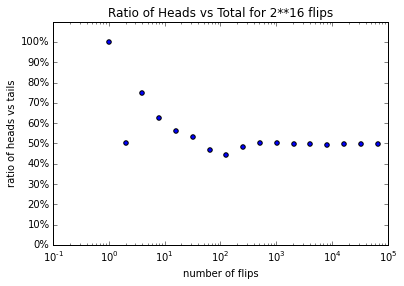

In [10]:
plt.scatter(total,[x/(x+y) for x,y in flip_data])
plt.xscale('log')
plt.yticks(ratio_axis, ratio_axis_label)
plt.xlabel('number of flips')
plt.ylabel('ratio of heads vs tails')
plt.title('Ratio of Heads vs Total for 2**16 flips')
plt.show()

# Scatter plot of Ratio of Heads vs Total flips for 2<sub>16</sub> flips.
## Observations
    1. As with the above this is a match of the line plot previously shown

In [11]:
def n_flips_20():
    return [n_flips() for x in range(20)]

In [12]:
twenty = n_flips_20()

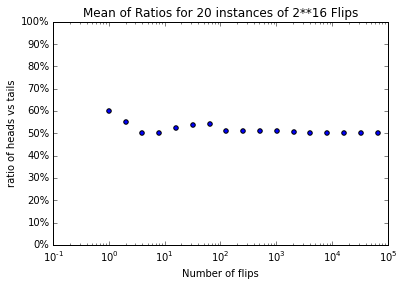

In [28]:
twenty_ratio = [get_ratio(n) for n in twenty]
unpacked_twenty = [statistics.mean(x) for x in list(zip(*twenty_ratio))]
plt.scatter(total,unpacked_twenty)
plt.xscale('log')
plt.xlabel('Number of flips')
plt.ylabel('Mean of Ratios for 20 Runs')
plt.title('Mean of Ratios for 20 instances of 2**16 Flips')
plt.yticks(ratio_axis, ratio_axis_label)
plt.ylabel('ratio of heads vs tails')
plt.show()

# Mean of Ratios for 20 Runs of 2<sup>16</sup> Flips
## Observations
    1. Here since we are averaging 20 attempts we expect to see a much flatter line around 50%, and we do!
    2. We also manage to eliminate the fact we had to start at 100% or 0% and remove a lot of the noise for the lower number of flips.
   

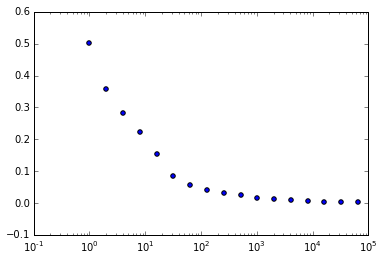

In [14]:
sd_twenty = [statistics.stdev(x) for x in list(zip(*twenty_ratio))]
plt.scatter(get_total(flip_data),sd_twenty)
plt.xscale('log')


In [15]:
def flip_100k_100():
    return [n_flips(100) for x in range(100000)]

In [16]:
hkh_data = flip_100k_100()

In [17]:
ret = [x[len(x)-1] for x in hkh_data]
ratio_hkh_data = get_ratio(ret)

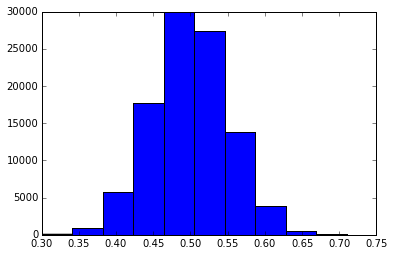

In [18]:
plt.hist(ratio_hkh_data)
plt.show()


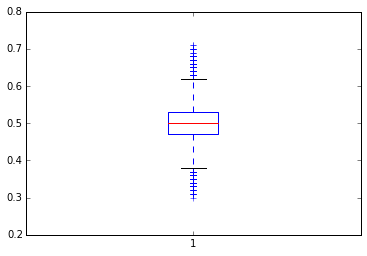

In [19]:
plt.boxplot(ratio_hkh_data)
plt.show()

In [20]:
def flip_100k_1000():
    return [n_flips(1000) for x in range(100000)]

In [21]:
hkt_data = flip_100k_1000()

In [22]:
ret = [x[len(x)-1] for x in hkt_data]
ratio_hkt_data = get_ratio(ret)

(array([    38.,    464.,   3647.,  15697.,  28930.,  29702.,  16817.,
          4069.,    577.,     59.]),
 array([ 0.433 ,  0.4463,  0.4596,  0.4729,  0.4862,  0.4995,  0.5128,
         0.5261,  0.5394,  0.5527,  0.566 ]),
 <a list of 10 Patch objects>)

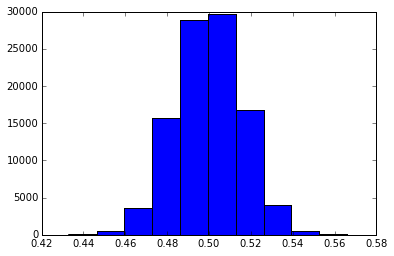

In [23]:
plt.hist(ratio_hkt_data)

{'boxes': [<matplotlib.lines.Line2D at 0x10c53bd68>],
 'caps': [<matplotlib.lines.Line2D at 0x10c4244a8>,
 'fliers': [<matplotlib.lines.Line2D at 0x10c2c9940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10c46ae10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10c53b2b0>,
  <matplotlib.lines.Line2D at 0x10c424a20>]}

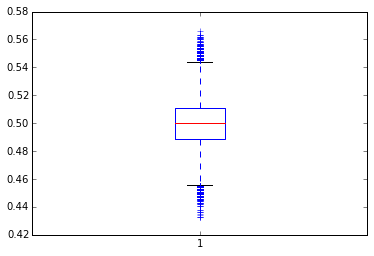

In [24]:
plt.boxplot(ratio_hkt_data)

{'boxes': [<matplotlib.lines.Line2D at 0x10c68ea20>,
 'caps': [<matplotlib.lines.Line2D at 0x10c2e0b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x10c5cab38>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10c5ca4e0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10c30a898>,
  <matplotlib.lines.Line2D at 0x10c43e668>]}

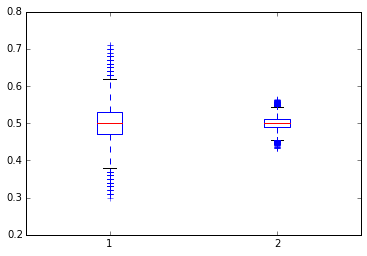

In [25]:
plt.boxplot([ratio_hkh_data,ratio_hkt_data])